
# Multiple Linear Regression using the Ordinary Least Squares (OLS)


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


df = pd.read_csv("model_result.csv")
x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
y_train = df['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet.csv")
x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","total_num_of_neurons_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","total_num_of_neurons_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']

x_train = sm.add_constant(x_train)
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()
print(olsres.summary())
x_test = sm.add_constant(x_test)
y_pred = olsres.predict(x_test)


print(y_pred)
# Calculate percentage error
per_err = (y_test - y_pred) / y_test
print(per_err)
# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)
  
# Print the MAPE value 
print(f'''
MAPE of OLS  : { round(MAPE, 2) }

''')
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("OLS Regression Results")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         Execution_time   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6592.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:08:08   Log-Likelihood:                -1251.7
No. Observations:                 532   AIC:                             2517.
Df Residuals:                     525   BIC:                             2547.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

ValueError: shapes (97,6) and (7,) not aligned: 6 (dim 1) != 7 (dim 0)

# Multi-Layer Perceptrons (MLP)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
17/17 [==============================] - 0s 685us/step - loss: 682.8427
Epoch 2/1000
17/17 [==============================] - 0s 1ms/step - loss: 174.4169
Epoch 3/1000
17/17 [==============================] - 0s 549us/step - loss: 89.9722
Epoch 4/1000
17/17 [==============================] - 0s 1ms/step - loss: 59.6023
Epoch 5/1000
17/17 [==============================] - 0s 945us/step - loss: 43.8915
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 34.8039
Epoch 7/1000
17/17 [

17/17 [==============================] - 0s 529us/step - loss: 7.0246
Epoch 92/1000
17/17 [==============================] - 0s 516us/step - loss: 6.8279
Epoch 93/1000
17/17 [==============================] - 0s 518us/step - loss: 6.8599
Epoch 94/1000
17/17 [==============================] - 0s 544us/step - loss: 6.9630
Epoch 95/1000
17/17 [==============================] - 0s 816us/step - loss: 6.9570
Epoch 96/1000
17/17 [==============================] - 0s 535us/step - loss: 6.8905
Epoch 97/1000
17/17 [==============================] - 0s 503us/step - loss: 6.7225
Epoch 98/1000
17/17 [==============================] - 0s 517us/step - loss: 6.9025
Epoch 99/1000
17/17 [==============================] - 0s 505us/step - loss: 6.8313
Epoch 100/1000
17/17 [==============================] - 0s 654us/step - loss: 6.7291
Epoch 101/1000
17/17 [==============================] - 0s 660us/step - loss: 6.9290
Epoch 102/1000
17/17 [==============================] - 0s 509us/step - loss: 6.8355
Epo

17/17 [==============================] - 0s 627us/step - loss: 6.1535
Epoch 284/1000
17/17 [==============================] - 0s 837us/step - loss: 6.1936
Epoch 285/1000
17/17 [==============================] - 0s 590us/step - loss: 6.2104
Epoch 286/1000
17/17 [==============================] - 0s 1ms/step - loss: 6.1091
Epoch 287/1000
17/17 [==============================] - 0s 811us/step - loss: 6.1757
Epoch 288/1000
17/17 [==============================] - 0s 514us/step - loss: 6.1923
Epoch 289/1000
17/17 [==============================] - 0s 499us/step - loss: 6.2801
Epoch 290/1000
17/17 [==============================] - 0s 492us/step - loss: 6.0977
Epoch 291/1000
17/17 [==============================] - 0s 764us/step - loss: 6.2145
Epoch 292/1000
17/17 [==============================] - 0s 547us/step - loss: 6.2657
Epoch 293/1000
17/17 [==============================] - 0s 796us/step - loss: 6.3242
Epoch 294/1000
17/17 [==============================] - 0s 529us/step - loss: 6.19

17/17 [==============================] - 0s 580us/step - loss: 6.0405
Epoch 476/1000
17/17 [==============================] - 0s 565us/step - loss: 6.0489
Epoch 477/1000
17/17 [==============================] - 0s 605us/step - loss: 6.0573
Epoch 478/1000
17/17 [==============================] - 0s 577us/step - loss: 6.0871
Epoch 479/1000
17/17 [==============================] - 0s 595us/step - loss: 5.9953
Epoch 480/1000
17/17 [==============================] - 0s 584us/step - loss: 6.0476
Epoch 481/1000
17/17 [==============================] - 0s 615us/step - loss: 5.9138
Epoch 482/1000
17/17 [==============================] - 0s 650us/step - loss: 6.0738
Epoch 483/1000
17/17 [==============================] - 0s 713us/step - loss: 6.0338
Epoch 484/1000
17/17 [==============================] - 0s 625us/step - loss: 6.1076
Epoch 485/1000
17/17 [==============================] - 0s 635us/step - loss: 6.0555
Epoch 486/1000
17/17 [==============================] - 0s 639us/step - loss: 6.

17/17 [==============================] - 0s 826us/step - loss: 5.8754
Epoch 668/1000
17/17 [==============================] - 0s 639us/step - loss: 5.7672
Epoch 669/1000
17/17 [==============================] - 0s 722us/step - loss: 5.8315
Epoch 670/1000
17/17 [==============================] - 0s 855us/step - loss: 5.7940
Epoch 671/1000
17/17 [==============================] - 0s 505us/step - loss: 5.8277
Epoch 672/1000
17/17 [==============================] - 0s 668us/step - loss: 5.7652
Epoch 673/1000
17/17 [==============================] - 0s 666us/step - loss: 5.8115
Epoch 674/1000
17/17 [==============================] - 0s 509us/step - loss: 5.7973
Epoch 675/1000
17/17 [==============================] - 0s 510us/step - loss: 5.7619
Epoch 676/1000
17/17 [==============================] - ETA: 0s - loss: 1.558 - 0s 519us/step - loss: 5.8467
Epoch 677/1000
17/17 [==============================] - 0s 522us/step - loss: 5.7994
Epoch 678/1000
17/17 [==============================] - 

17/17 [==============================] - 0s 649us/step - loss: 5.6584
Epoch 860/1000
17/17 [==============================] - 0s 587us/step - loss: 5.7205
Epoch 861/1000
17/17 [==============================] - 0s 623us/step - loss: 5.7009
Epoch 862/1000
17/17 [==============================] - 0s 629us/step - loss: 5.6857
Epoch 863/1000
17/17 [==============================] - 0s 629us/step - loss: 5.6919
Epoch 864/1000
17/17 [==============================] - 0s 634us/step - loss: 5.7632
Epoch 865/1000
17/17 [==============================] - 0s 645us/step - loss: 5.7686
Epoch 866/1000
17/17 [==============================] - 0s 639us/step - loss: 5.7103
Epoch 867/1000
17/17 [==============================] - 0s 638us/step - loss: 5.7223
Epoch 868/1000
17/17 [==============================] - 0s 631us/step - loss: 5.7377
Epoch 869/1000
17/17 [==============================] - 0s 609us/step - loss: 5.7332
Epoch 870/1000
17/17 [==============================] - 0s 615us/step - loss: 5.

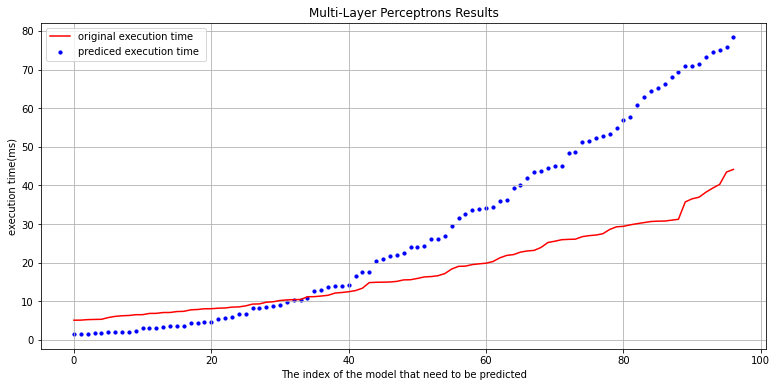

In [3]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_test = df_pred['Execution_time']


df = pd.read_csv("model_result.csv")
x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
y_train = df['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet.csv")
x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
# y_test = df_pred['Execution_time']

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

# model = tf.keras.Sequential([tf.keras.layers.Dense(8, activation = 'sigmoid', input_shape = x_train.shape[1:]),
#                              tf.keras.layers.Dense(5, activation = 'sigmoid'),
#                             tf.keras.layers.Dense(1)])

model.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')
model.summary()
history = model.fit(x_train, y_train, epochs=1000)

y_pred = model.predict(x_test)

y_test = np.array(y_test).reshape(-1,1)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test
#print(per_err)

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)
MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print("MAPE of MLP  :" , round(MAPE, 2) )

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
plt.figure(figsize=(13,6))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Multi-Layer Perceptrons Results")
plt.show()

#  Random Forest (RF)

        
The lowest MAPE of Random Forest  : 21.0, the number of estimator :57




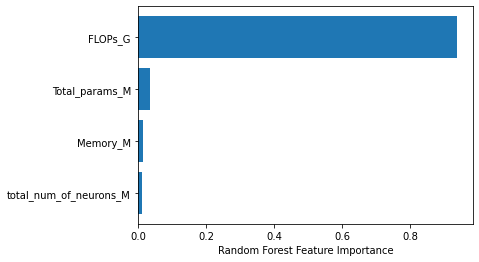

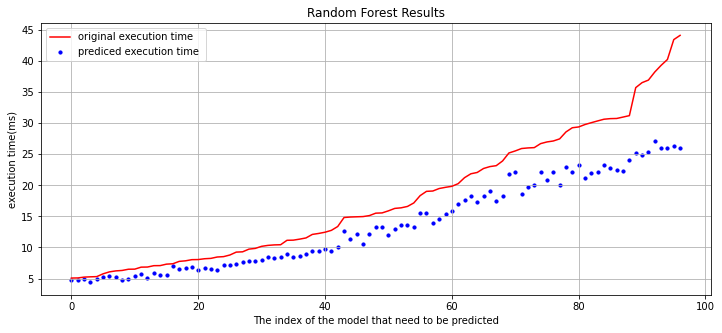

In [4]:
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model


df = pd.read_csv("model_result.csv")
x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
y_train = df['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet.csv")
x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
# y_test = df_pred['Execution_time']
MAPE_default=10000
MAPE_better=MAPE_default
for num_estimators in range(1,150,2):

    # Initializing the Random Forest Regression model with 50 decision trees
    model = RandomForestRegressor(n_estimators = num_estimators, random_state = 0)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train) 

    # Predicting the target values of the test set
    y_pred_current = model.predict(x_test)

    # Calculate percentage error
    per_err = (y_test - y_pred_current) / y_test

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of Random Forest  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_num_estimators = num_estimators
        MAPE_better = MAPE
        y_pred = y_pred_current
        
print(f'''        
The lowest MAPE of Random Forest  : { round(MAPE_better, 2) }, the number of estimator :{ better_num_estimators }

''')
# plt.barh(x_train.columns, model.feature_importances_)
sorted_idx = model.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Random Forest Results")
plt.show()

        
The MAPE of Random Forest  : 20.64, the number of estimator :7




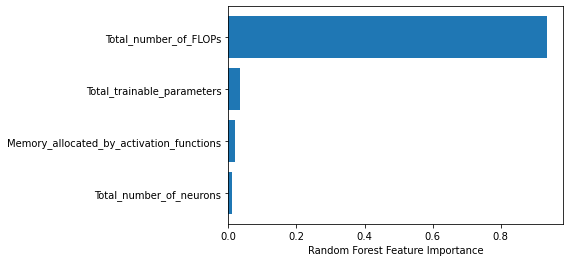

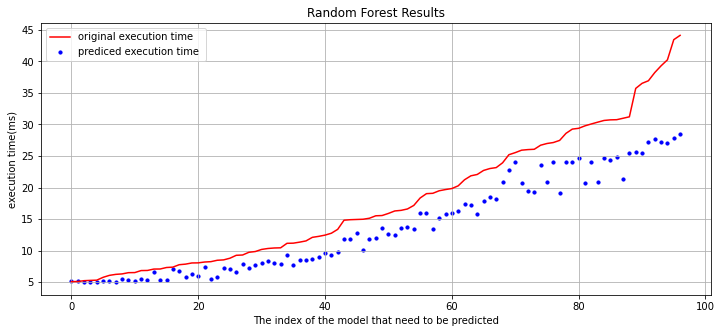

In [2]:
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model


# df = pd.read_csv("model_result_for_feature_importance.csv")
# x_train = df[["FLOPs","Total_params","Memory","total_num_of_neurons"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
# x_test = df_pred[["FLOPs","Total_params","Memory","total_num_of_neurons"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result_for_feature_importance.csv")
# train, valid = train_test_split(df, test_size=0.2)
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_train = train['Execution_time']

# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]] 
# y_test = df_pred['Execution_time']

df = pd.read_csv("model_result_for_feature_importance.csv")
ds = df.sample(frac=1)
ds.to_csv("shuffel_model_result.csv")
train, valid = train_test_split(df, test_size=0.2)
x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
y_train = train['Execution_time']

x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
y_test = df_pred['Execution_time']



MAPE_default=10000
MAPE_better=MAPE_default
for num_estimators in range(1,10,2):

    # Initializing the Random Forest Regression model with 50 decision trees
    model = RandomForestRegressor(n_estimators = num_estimators, random_state = 0, min_samples_leaf = 10)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train) 

    # Predicting the target values of the validation set
    y_valid_current = model.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of Random Forest  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_num_estimators = num_estimators
        MAPE_better = MAPE

        
# Initializing the Random Forest Regression model with 50 decision trees
model = RandomForestRegressor(n_estimators = better_num_estimators, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

# Predicting the target values of the test set
y_pred = model.predict(x_test)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
        
        
print(f'''        
The MAPE of Random Forest  : { round(MAPE, 2) }, the number of estimator :{ better_num_estimators }

''')
# plt.barh(x_train.columns, model.feature_importances_)
sorted_idx = model.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Random Forest Results")
plt.show()

# Support Vector Regression (SVR)

The lowest MAPE of SVR 17.013984302155087
The lowest MAPE of SVR 8.34073929592886
The lowest MAPE of SVR 6.63811388915212
The lowest MAPE of SVR 6.160163113705334
The lowest MAPE of SVR 5.688323222273912
The lowest MAPE of SVR 5.628709632409573
The lowest MAPE of SVR 5.52271394036664
The lowest MAPE of SVR 5.386715704298477
The lowest MAPE of SVR 5.334938483095835
The lowest MAPE of SVR 5.212810404318764
The lowest MAPE of SVR 5.136691569970132
The lowest MAPE of SVR 5.132340294222594
The lowest MAPE of SVR 5.096032571388789
The lowest MAPE of SVR 5.0572944582687835
The lowest MAPE of SVR 5.03291503063009
The lowest MAPE of SVR 5.003515388131572
The lowest MAPE of SVR 4.9991321087123435
The lowest MAPE of SVR 4.958942373544394
The lowest MAPE of SVR 4.9407469734181095
The lowest MAPE of SVR 4.930302196800872
The lowest MAPE of SVR 4.911898202442888
The lowest MAPE of SVR 4.9109845326143615
The lowest MAPE of SVR 4.894823444550652
The lowest MAPE of SVR 4.875793603485944
The lowest MAPE

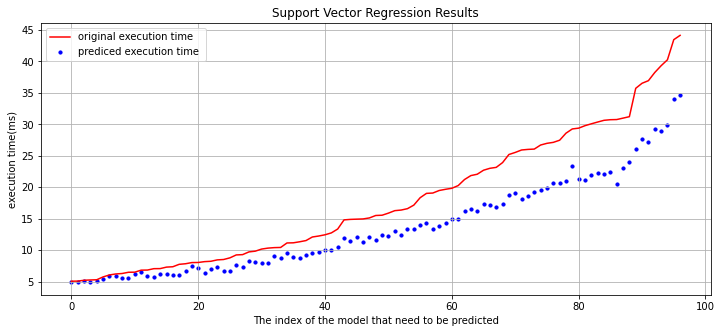

In [17]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from itertools import product
# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline



# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


df = pd.read_csv("model_result_for_feature_importance.csv")
train, valid = train_test_split(df, test_size=0.25)
x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons"]]
y_train = train['Execution_time']

x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons"]] 
y_test = df_pred['Execution_time']
# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
# y_test = df_pred['Execution_time']
# ----------- Model fitting -----------

# model1 = LinearRegression()
# lr = model1.fit(x_train, y_train)
MAPE_default=10000
MAPE_better=MAPE_default
range_C =range(1,400,2)
range_epsilon =range(1,10,1)
for value_C, value_epsilon in product(range_C,range_epsilon):
    
    model2 = SVR(kernel='rbf', C=value_C, epsilon=value_epsilon) # set kernel and hyperparameters
    
    svr = model2.fit(x_train, y_train)

    # Predicting the target values of the test set
    y_valid_current = model2.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of Random Forest  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_C = value_C
        better_epsilon = value_epsilon
        MAPE_better = MAPE
        print("The lowest MAPE of SVR",MAPE_better)

model2 = SVR(kernel='rbf', C=better_C, epsilon=better_epsilon) # set kernel and hyperparameters

svr = model2.fit(x_train, y_train)

# Predicting the target values of the test set
y_pred = model2.predict(x_test)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
        
        
print(f'''        
The MAPE of SVR  : { round(MAPE, 2) }, the value of hyperparameters :C = {better_C}, epsilon = {better_epsilon}

''')




index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("Support Vector Regression Results")
plt.show()


# plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original y")
# plt.scatter(np.arange(len(y_lr)),y_lr[index],s=3,c="b",label="prediction")
# plt.legend(loc="upper left")
# plt.grid()
# plt.xlabel("index")
# plt.ylabel("y")
# plt.title(":")
# plt.show()

# eXtreme Gradient Boosting (XGBoost)

        
        The lowest MAPE of XGBoost  : 80.41
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 2

        
        
        The lowest MAPE of XGBoost  : 60.85
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 6

        
        
        The lowest MAPE of XGBoost  : 47.6
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 10

        
        
        The lowest MAPE of XGBoost  : 38.3
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 14

        
        
        The lowest MAPE of XGBoost  : 32.62
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth

        
        The lowest MAPE of XGBoost  : 19.84
        the value of hyperparameters :
        colsample_bytree = 0.7999999999999999
        learning_rate = 0.30000000000000004
        max_depth = 5
        n_estimators = 14

        
        
        The lowest MAPE of XGBoost  : 19.44
        the value of hyperparameters :
        colsample_bytree = 0.7999999999999999
        learning_rate = 0.30000000000000004
        max_depth = 5
        n_estimators = 18

        
        
        The lowest MAPE of XGBoost  : 19.39
        the value of hyperparameters :
        colsample_bytree = 0.7999999999999999
        learning_rate = 0.30000000000000004
        max_depth = 5
        n_estimators = 22

        


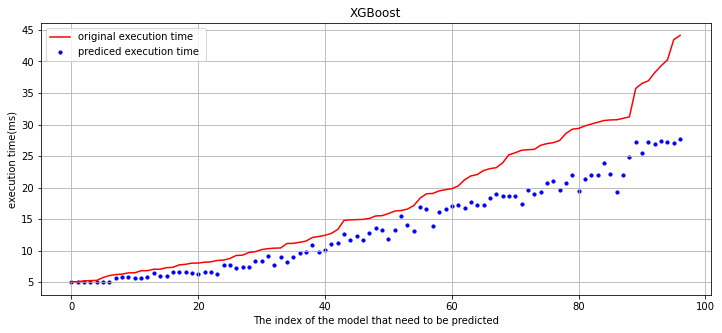

In [12]:
import xgboost as xgb
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from itertools import product
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

df = pd.read_csv("model_result.csv")
x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
y_train = df['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet.csv")
x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
# y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
# y_test = df_pred['Execution_time']
MAPE_default=10000
MAPE_better=MAPE_default
range_colsample_bytree = np.arange(0.5,1.0,0.1)
range_learning_rate = np.arange(0.1,0.35,0.05)
range_max_depth = range(3,11,1)
range_n_estimators = range(2,54,4)
for value_colsample_bytree, value_learning_rate, value_max_depth, value_n_estimators in product(range_colsample_bytree,range_learning_rate,range_max_depth,range_n_estimators):
#     xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.9,
#                     max_depth = 9, n_estimators = 47)

    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = value_colsample_bytree, learning_rate =value_learning_rate,
                    max_depth = value_max_depth, n_estimators = value_n_estimators)
    xg_reg.fit(x_train,y_train)

    y_pred_current = xg_reg.predict(x_test)
    # Calculate percentage error
    per_err = (y_test - y_pred_current) / y_test

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100


    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of XGBoost  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_colsample_bytree = value_colsample_bytree
        better_learning_rate = value_learning_rate
        better_max_depth = value_max_depth
        better_n_estimators = value_n_estimators
        MAPE_better = MAPE
        y_pred = y_pred_current
                
        print(f'''        
        The lowest MAPE of XGBoost  : { round(MAPE_better, 2) }
        the value of hyperparameters :
        colsample_bytree = {better_colsample_bytree}
        learning_rate = {better_learning_rate}
        max_depth = {better_max_depth}
        n_estimators = {better_n_estimators}

        ''')
        
        
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("XGBoost")
plt.show()

In [1]:
index

NameError: name 'index' is not defined


MAPE of XGBoost  : 22.98


Index(['FLOPs_G', 'Total_params_M', 'Memory_M'], dtype='object')
[0.7050689  0.09445249 0.20047869]


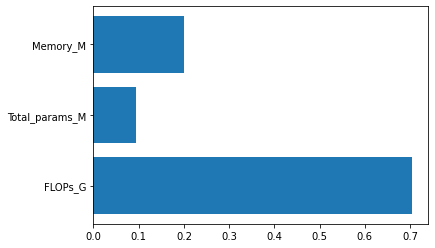

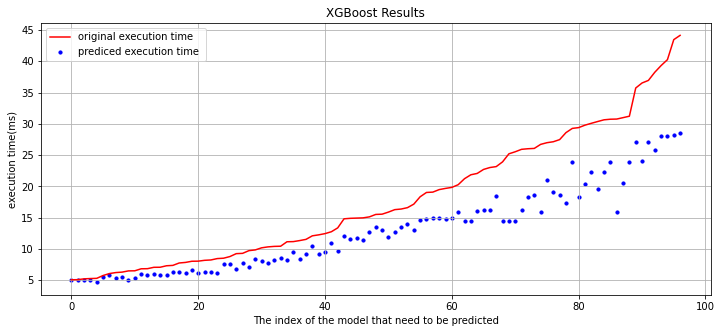

In [11]:
import xgboost as xgb
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from matplotlib import pyplot
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M"]]
# y_test = df_pred['Execution_time']


df = pd.read_csv("model_result.csv")
x_train = df[["FLOPs_G","Total_params_M","Memory_M"]]
y_train = df['Execution_time']

df_pred = pd.read_csv("model_result_AlexNet.csv")
x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M"]]
y_test = df_pred['Execution_time']

# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M"]]
# y_test = df_pred['Execution_time']


# df = pd.read_csv("model_result.csv")
# x_train = df[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet.csv")
# x_test = df_pred[["FLOPs_G","Total_params_M","Memory_M","total_num_of_neurons_M","input_horizontal","number_of_layers"]] 
# y_test = df_pred['Execution_time']

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.25,
               max_depth = 4, n_estimators = 30)

xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)
# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100


# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)

# Print the MAPE value 
print(f'''
MAPE of XGBoost  : { round(MAPE, 2) }

''')
print(x_train.columns)
print(xg_reg.feature_importances_)
plt.barh(x_train.columns, xg_reg.feature_importances_)

pyplot.show()
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original execution time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="prediced execution time ")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("The index of the model that need to be predicted")
plt.ylabel("execution time(ms)")
plt.title("XGBoost Results")
plt.show()

In [ ]:
import xgboost as xgb
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

df = pd.read_csv("2_variables.csv")
x1 = df["FLOPs_G"].values.tolist()
x2 = df["Memory_M"].values.tolist()
# x3 = df["Total_params_M"].values.tolist()
y = df['Execution_time'].values.tolist()
x_train =np.array(list(zip(x1,x2)))
print(x_train.shape)
y_train = np.array(y)
df_pred = pd.read_csv("pred_2_variables.csv")
x1_pred = df_pred["FLOPs_G"].values.tolist()
x2_pred = df_pred["Memory_M"].values.tolist()
x_test =np.array(list(zip(x1_pred,x2_pred)))
y_pred = df_pred['Execution_time'].values.tolist()

y_test = np.array(y_pred)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 20, n_estimators = 10)


xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)
print(y_pred)
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original y")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()